# Manufacturing Data Analysis

## Project Overview
This project analyzes sensor, production, and quality data from a manufacturing line. The goal is to explore the dataset, calculate key performance indicators, and identify patterns or issues that could impact production efficiency and product quality.

The analysis focuses on:
- Machine operational status (On, Off, Standby)
- Sensor readings to detect abnormal conditions
- Product counts to monitor throughput
- Quality checks to identify potential defects or failures

## Dataset Description
The dataset includes:
1. **ID**: Unique identifier for each row
2. **Timestamp**: Date and time of the record
3. **SensorReading**: Simulated sensor value (0–100)
4. **MachineStatus**: Status of the machine (On, Off, Standby)
5. **QualityCheck**: Boolean indicating pass/fail of a quality check
6. **ProductCount**: Number of products processed in the cycle

## Findings (randomly generated data)
- The machine is OFF or idle more than 2/3 of the time
- Only 51.7% of production passes quality
- No correlation between SensorReading, Productcount and Quality check numerics, due to random values

---

   ID                   Timestamp  SensorReading MachineStatus  QualityCheck  \
0   1  2023-11-22 09:24:28.749389      43.081004       Standby          True   
1   2  2023-11-21 09:24:28.749396      71.312491            On          True   
2   3  2023-11-20 09:24:28.749399      19.096745       Standby         False   
3   4  2023-11-19 09:24:28.749400      28.951475            On          True   
4   5  2023-11-18 09:24:28.749401      46.283914       Standby          True   
5   6  2023-11-17 09:24:28.749402      16.650376            On         False   
6   7  2023-11-16 09:24:28.749403      62.516470       Standby          True   
7   8  2023-11-15 09:24:28.749404       7.724392           Off          True   
8   9  2023-11-14 09:24:28.749405      88.271366           Off          True   
9  10  2023-11-13 09:24:28.749406      53.349997           Off          True   

   ProductCount  
0            21  
1            18  
2            10  
3            24  
4            23  
5          

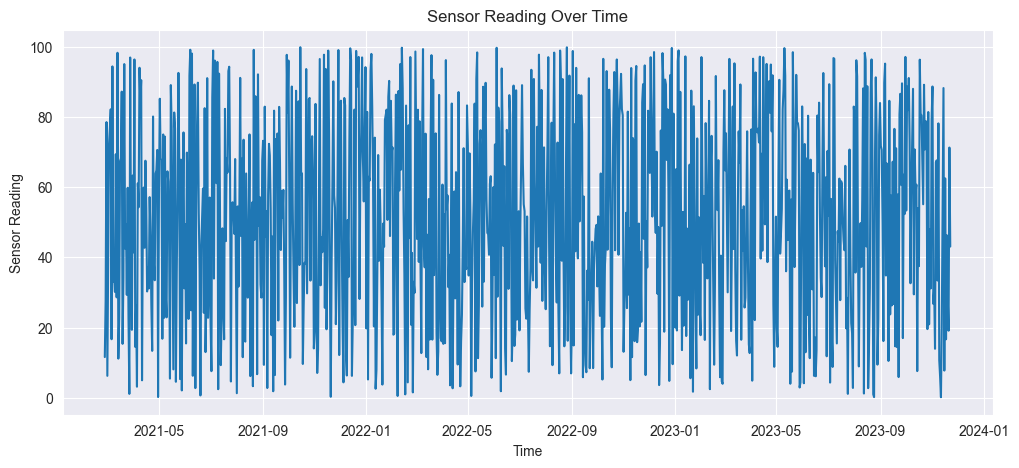

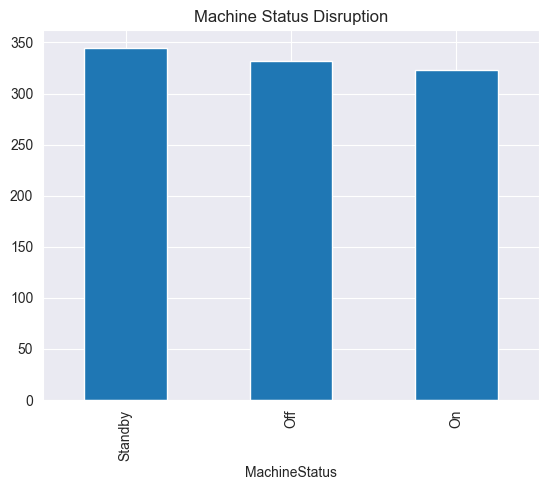

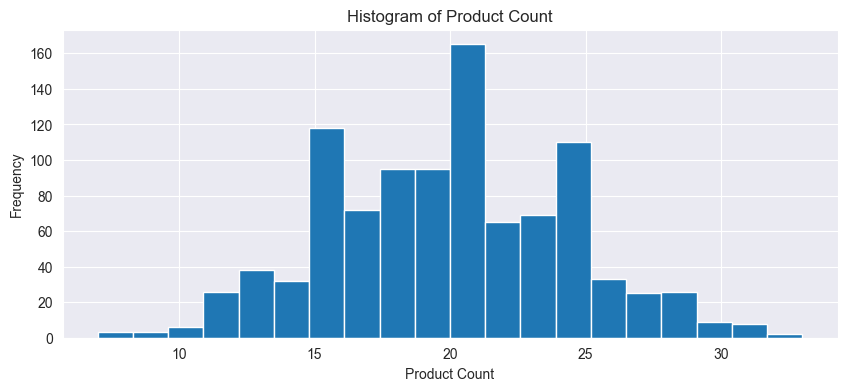

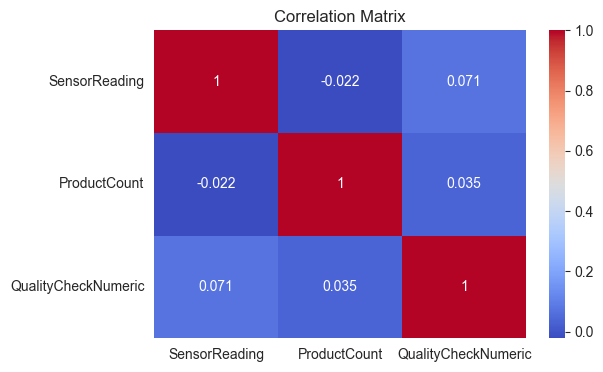

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and inspecting the data
df = pd.read_csv('/Users/alberthmartin/Desktop/manufacturing_process_data.csv')

print(df.head(10))
# Data Cleaning
#Converting timestaps
df.columns = df.columns.str.strip()  # remove spaces
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Check for missing values
df.isnull().sum()
# Remove outliers in SensorReading
df = df[(df['SensorReading'] >= 0) & (df['SensorReading'] <= 100)]

#Key Metrics
# Machine uptime percentages
uptime = df['MachineStatus'].value_counts(normalize=True) * 100
print(uptime)

#Quality pass rate
pass_rate = df['QualityCheck'].mean() * 100
print(f"Quality Pass Rate: {pass_rate:.2f}%")


## Visualizations ###
# Sensor readings over time
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['SensorReading'])
plt.title("Sensor Reading Over Time")
plt.xlabel("Time")
plt.ylabel("Sensor Reading")
plt.show()

# Machine status disruption
df['MachineStatus'].value_counts().plot(kind='bar',title='Machine Status Disruption')
plt.show()


# Product count histogram
df['ProductCount'].plot(kind='hist', bins=20, figsize=(10,4))
plt.title('Histogram of Product Count')
plt.xlabel('Product Count')
plt.show()

## Analysis insights ###
# Correlation
df['QualityCheckNumeric'] = df['QualityCheck'].astype(int)

# Select only numeric columns
numeric_cols = ['SensorReading', 'ProductCount', 'QualityCheckNumeric']

# Compute correlation
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()